<a href="https://colab.research.google.com/github/sagargahalod/Misc/blob/master/Ridge_and_Lasso_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Overview

    Ridge and Lasso Regression are types of Regularization techniques
    Regularization techniques are used to deal with overfitting and when the dataset is large
    Ridge and Lasso Regression involve adding penalties to the regression function


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [18]:
from sklearn.linear_model import ridge_regression,LinearRegression,Ridge,RidgeCV,LassoCV,Lasso
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.datasets import load_diabetes

In [12]:
data = load_diabetes()
X = data.data
y = data.target


In [15]:
X.shape,y.shape

((442, 10), (442,))

In [20]:
for mod in [Ridge,Lasso]:
  model = mod()
  print('%s %s'%(mod.__name__,cross_val_score(model,X,y).mean()))

Ridge 0.41017583365872845
Lasso 0.3375597834274946


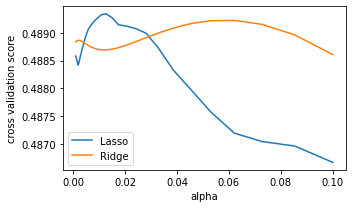

In [25]:
alphas = np.logspace(-3, -1, 30)

plt.figure(figsize=(5, 3))

for Model in [Lasso, Ridge]:
    scores = [cross_val_score(Model(alpha), X, y, cv=3).mean()
            for alpha in alphas]
    plt.plot(alphas, scores, label=Model.__name__)

plt.legend(loc='lower left')
plt.xlabel('alpha')
plt.ylabel('cross validation score')
plt.tight_layout()
plt.show()

  